# NYC Street Trees

* **Data:** `street-trees.csv`
* **Description:** Every five years New York City counts all of the trees that are planted on the streets of the city (not in parks).
* **Source:** https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh
* **Columns of interest:**
    * `tree_dbh` width of the tree's trunk, in inches. If it's `0`, it was not measured.
    * `stump_diam` width of the tree's stump, in inches (if the tree has been cut down). If it's `0`, it was not measured.
    * `curb` how close to the curb it is
    * `status` whether it is alive or not
    * `health` how healthy it is 
    * `spc_latin` the Latin/scientific name for the tree
    * `guards` whether guards are installed to protect it from trees/dogs/etc
    * `sidewalk` whether the roots have damaged the surrounding sidewalk
    * `zipcode` Five-digit zipcode in which tree is located
    * `borough` Name of borough in which tree is located
    * `nta_name` Name of neighborhood in which tree is located

## Read in your data

In [85]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import requests

ModuleNotFoundError: No module named 'requests'

In [86]:
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", '{:,}'.format)


pd.read_csv("street-trees.csv", encoding="utf-8")
df = pd.read_csv("street-trees.csv", encoding="utf-8")

# df = pd.read_csv("street-trees.csv", nrows = 2000000, encoding="utf-8")

df.columns = df.columns.str.lower().str.replace(" ", "_")

In [87]:
df

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trnk_wire,trnk_light,trnk_other,brnch_ligh,brnch_shoe,brnch_othe,address,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
0,08/27/2015,180683,348711,POINT (-73.84421521958048 40.723091773924274),3.0,NaN,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.72309177,-73.84421522,"1,027,431.14821","202,756.768749"
1,09/03/2015,200540,315986,POINT (-73.81867945834878 40.79411066708779),21.0,NaN,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.79411067,-73.81867946,"1,034,455.70109","228,644.837379"
2,09/05/2015,204026,218365,POINT (-73.93660770459083 40.717580740099116),3.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.71758074,-73.9366077,"1,001,822.83131","200,716.891267"
3,09/05/2015,204337,217969,POINT (-73.93445615919741 40.713537494833226),10.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.71353749,-73.93445616,"1,002,420.35833","199,244.253136"
4,08/30/2015,189565,223043,POINT (-73.97597938483258 40.66677775537875),21.0,NaN,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.66677776,-73.97597938,"990,913.775046","182,202.425999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,08/18/2015,155433,217978,POINT (-73.95494401022562 40.7132107823145),25.0,NaN,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,32 MARCY AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3051900,New York,40.71321078,-73.95494401,"996,740.685965","199,121.636255"
683784,08/29/2015,183795,348185,POINT (-73.85665019989099 40.71519444267162),7.0,NaN,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,67-035 SELFRIDGE STREET,11375,Forest Hills,406,4,Queens,29,28,15,QN17,Forest Hills,4070700,New York,40.71519444,-73.8566502,"1,023,989.07438","199,873.647547"
683785,08/22/2015,166161,401670,POINT (-74.13651724205825 40.62076152739799),12.0,NaN,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,130 BIDWELL AVENUE,10314,Staten Island,501,5,Staten Island,50,63,24,SI07,Westerleigh,5020100,New York,40.62076153,-74.13651724,"946,351.410431","165,466.07627"
683786,08/29/2015,184028,504204,POINT (-73.90311472453581 40.850828186655754),9.0,NaN,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1985 ANTHONY AVENUE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2023502,New York,40.85082819,-73.90311472,"1,011,053.64553","249,271.950653"


In [149]:
# df.shape

In [150]:
# df.dtypes

In [90]:
# df.head(5)

## What is the percentage of alive vs dead trees?

In [91]:
# raw numbers 
# df.status.value_counts()

# percentage
df.status.value_counts(normalize=True) * 100
# df.status.value_counts(normalize=True, dropna=False) * 100

Alive    95.37649095918617
Stump    2.581794357315425
Dead    2.0417146834983946
Name: status, dtype: float64

## Filter your dataframe to only been trees that are still alive

In [92]:
df_alive = df[df.status == 'Alive']

In [93]:
df_alive

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trnk_wire,trnk_light,trnk_other,brnch_ligh,brnch_shoe,brnch_othe,address,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
0,08/27/2015,180683,348711,POINT (-73.84421521958048 40.723091773924274),3.0,NaN,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.72309177,-73.84421522,"1,027,431.14821","202,756.768749"
1,09/03/2015,200540,315986,POINT (-73.81867945834878 40.79411066708779),21.0,NaN,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.79411067,-73.81867946,"1,034,455.70109","228,644.837379"
2,09/05/2015,204026,218365,POINT (-73.93660770459083 40.717580740099116),3.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.71758074,-73.9366077,"1,001,822.83131","200,716.891267"
3,09/05/2015,204337,217969,POINT (-73.93445615919741 40.713537494833226),10.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.71353749,-73.93445616,"1,002,420.35833","199,244.253136"
4,08/30/2015,189565,223043,POINT (-73.97597938483258 40.66677775537875),21.0,NaN,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.66677776,-73.97597938,"990,913.775046","182,202.425999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,08/18/2015,155433,217978,POINT (-73.95494401022562 40.7132107823145),25.0,NaN,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,32 MARCY AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3051900,New York,40.71321078,-73.95494401,"996,740.685965","199,121.636255"
683784,08/29/2015,183795,348185,POINT (-73.85665019989099 40.71519444267162),7.0,NaN,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,67-035 SELFRIDGE STREET,11375,Forest Hills,406,4,Queens,29,28,15,QN17,Forest Hills,4070700,New York,40.71519444,-73.8566502,"1,023,989.07438","199,873.647547"
683785,08/22/2015,166161,401670,POINT (-74.13651724205825 40.62076152739799),12.0,NaN,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,130 BIDWELL AVENUE,10314,Staten Island,501,5,Staten Island,50,63,24,SI07,Westerleigh,5020100,New York,40.62076153,-74.13651724,"946,351.410431","165,466.07627"
683786,08/29/2015,184028,504204,POINT (-73.90311472453581 40.850828186655754),9.0,NaN,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1985 ANTHONY AVENUE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2023502,New York,40.85082819,-73.90311472,"1,011,053.64553","249,271.950653"


## What are the most common kinds of trees? Make a horizontal bar plot of the top five types of trees, with the longest bar at the top.

<AxesSubplot:>

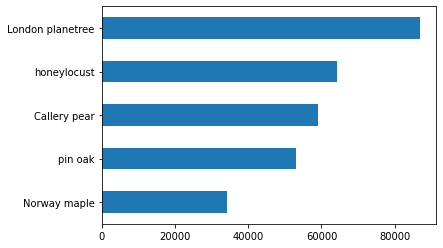

In [94]:
df_alive.spc_common.value_counts().head(5).sort_values().plot(kind='barh')

## For trees in Manhattan, what are the top 3 kinds of trees?

In [95]:
df_alive[df_alive.boroname == 'Manhattan'].spc_common.value_counts().head(3)

honeylocust     13175
Callery pear     7297
ginkgo           5859
Name: spc_common, dtype: int64

## What borough has the most trees in our dataset?

In [148]:
df_alive.boroname.value_counts()

Queens           237974
Brooklyn         169744
Staten Island    101443
Bronx             80585
Manhattan         62427
Name: boroname, dtype: int64

## Save a CSV file of just Honey Locust trees, calling it `honey-locusts.csv`

In [97]:
df_alive.spc_common = df.spc_common.str.lower().replace(" ", "_", regex=False)
# df

/Users/sm/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [98]:
# df[df.spc_common == 'honeylocust'].head()

In [99]:
honey_locusts = df_alive[df_alive.spc_common == 'honeylocust']
honey_locusts
honey_locusts.to_csv('honey-locusts.csv', index = False)

In [100]:
# df[df.spc_common.str.contains("locust")]

In [101]:
# df[df.spc_common == 'honey_locust'].head()

## How many trees are elm trees?

Count both `American elm` and `Chinese elm`.

In [124]:
df_alive[df_alive.spc_common == 'american_elm'].shape

(0, 43)

In [129]:
# df[df.spc_common == 'american_elm'].head(5)

In [130]:
df_alive[df_alive.spc_common == 'chinese_elm'].shape

(0, 43)

In [110]:
# df[df.spc_common == 'chinese_elm'].shape

## Create a new column called `width_cm` that is the width of the tree trunk in centimeters

You'll probably get a warning about "A value is trying to be set on a copy of a slice from a DataFrame." That's fine! It just means that this is only applying to alive trees, not the original CSV that includes dead trees and stumps.

In [104]:
df_alive['width_cm'] = df_alive['tree_dbh'] * (2.54)
df_alive.insert(1, "width_cm", df_alive['width_cm'])

/var/folders/c2/zngcssg14mv23nw0yr96s0wm0000gn/T/ipykernel_44627/2930122979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alive['width_cm'] = df_alive['tree_dbh'] * (2.54)


ValueError: cannot insert width_cm, already exists

In [111]:
df_alive.head(5)

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trnk_wire,trnk_light,trnk_other,brnch_ligh,brnch_shoe,brnch_othe,address,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,width_cm
0,08/27/2015,180683,348711,POINT (-73.84421521958048 40.723091773924274),3.0,NaN,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.72309177,-73.84421522,"1,027,431.14821","202,756.768749",7.62
1,09/03/2015,200540,315986,POINT (-73.81867945834878 40.79411066708779),21.0,NaN,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.79411067,-73.81867946,"1,034,455.70109","228,644.837379",53.34
2,09/05/2015,204026,218365,POINT (-73.93660770459083 40.717580740099116),3.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.71758074,-73.9366077,"1,001,822.83131","200,716.891267",7.62
3,09/05/2015,204337,217969,POINT (-73.93445615919741 40.713537494833226),10.0,NaN,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.71353749,-73.93445616,"1,002,420.35833","199,244.253136",25.4
4,08/30/2015,189565,223043,POINT (-73.97597938483258 40.66677775537875),21.0,NaN,OnCurb,Alive,Good,Tilia americana,american linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.66677776,-73.97597938,"990,913.775046","182,202.425999",53.34


## What is the median trunk width, in centimeters?

In [114]:
df_alive.width_cm.median()

25.4

## What are the four trees with the widest trunks?

In [146]:
df_alive.sort_values(by='width_cm', ascending=False).head(4).round(2)

,created_at,tree_id,block_id,the_geom,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trnk_wire,trnk_light,trnk_other,brnch_ligh,brnch_shoe,brnch_othe,address,zipcode,zip_city,cb_num,borocode,boroname,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,width_cm
2385,08/23/2015,168583,226040,POINT (-73.94693592253036 40.67228657645615),425.0,NaN,OnCurb,Alive,Good,Quercus bicolor,swamp white oak,1or2,None,Damage,NYC Parks Staff,None,No,No,No,No,No,No,No,No,No,960 STERLING PLACE,11213,Brooklyn,308,3,Brooklyn,35,43,20,BK61,Crown Heights North,3033900,New York,40.67,-73.95,"998,969.77","184,212.99","1,079.5"
180735,10/23/2015,370606,332230,POINT (-73.75061560112965 40.67563634037032),389.0,NaN,OnCurb,Alive,Fair,Liriodendron tulipifera,tulip-poplar,None,None,Damage,NYC Parks Staff,None,No,No,No,No,No,No,No,No,No,136-032 220 PLACE,11413,Springfield Gardens,413,4,Queens,31,29,14,QN66,Laurelton,4035800,New York,40.68,-73.75,"1,053,424.69","185,527.42",988.06
270395,11/20/2015,476317,602575,POINT (-73.94306676395681 40.85087931360806),318.0,NaN,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1336 RIVERSIDE DRIVE,10033,New York,112,1,Manhattan,10,71,31,MN35,Washington Heights North,1027500,New York,40.85,-73.94,"1,000,000.77","249,280.87",807.72
201069,11/03/2015,418433,202962,POINT (-73.86964112633319 40.68836584931302),318.0,NaN,OnCurb,Alive,Good,Platanus x acerifolia,london planetree,None,None,NoDamage,NYC Parks Staff,BranchLights,No,No,No,No,No,No,Yes,No,No,100 NICHOLS AVENUE,11208,Brooklyn,305,3,Brooklyn,37,54,18,BK83,Cypress Hills-City Line,3118202,New York,40.69,-73.87,"1,020,402.31","190,093.58",807.72


In [143]:
# df_alive.width_cm.max()
# df_alive.sort_values(by='width_cm')

## What is the median trunk width, in centimeters, of trees that have damaged the sidewalk vs those who have not damaged the sidewalk?

In [134]:
df_alive.groupby('sidewalk').width_cm.median()

sidewalk
Damage     33.02
NoDamage   20.32
Name: width_cm, dtype: float64

In [133]:
# df_alive.width_cm.median()
# df_alive[df_alive.sidewalk == 'Damage'].width_cm.median()
# df_alive[df_alive.sidewalk == 'NoDamage'].width_cm.median()